**PERCEPTRON**
*   Perceptron, yapay sinir ağlarının temel yapıtaşıdır.
*   Basitçe, giriş verilerini alır, ağırlıklarla çarparak bir çıkış üretir ve bu çıktıyı belirli bir eşik değeriyle karşılaştırarak bir tahmin yapar. Eğer tahmin beklenen çıktıya yakınsa, ağ güncellenmez; ancak tahmin hatalıysa, ağırlıklar uygun şekilde güncellenir.
*   İkili sınıflandırma problemleri için kullanılır.
*   Tek katmanlı olduğu için karmaşık problemleri çözemez.
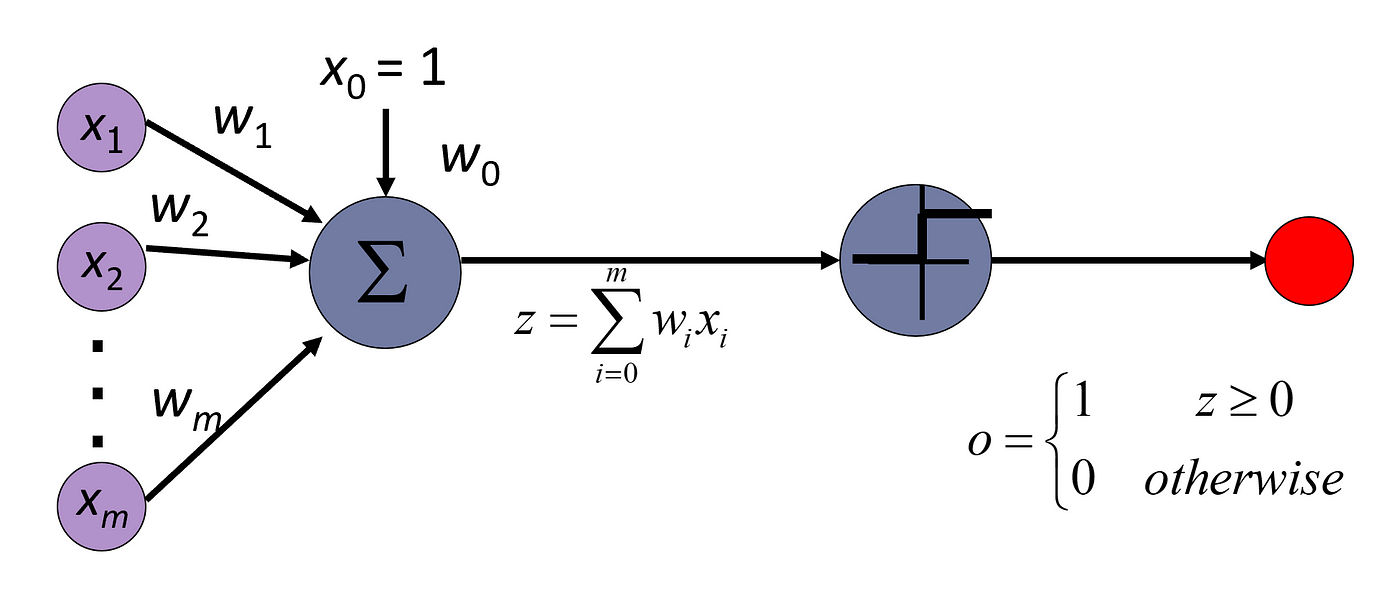



**KÜTÜPHANELERİ IMPORT EDELİM**

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

**PERCEPTRON SINIFI OLUŞTURMA**

In [52]:
class Perceptron:
  def __init__(self, learning_rate=0.001, n_epoch=10):
    #sınıfın constructor metodu
    self.learning_rate = learning_rate
    self.n_epoch = n_epoch
    self.weights = None
    self.bias = None,

  def fit(self,X,y):
    self.weights = np.zeros(X.shape[1])
    self.bias = 0

    for _ in range(self.n_epoch):
      for xi,target in zip(X,y):
        y_pred = self.predict(xi)
        error = target - y_pred
        self.weights += self.learning_rate * error * xi
        #yeni ağırlık = eski ağırlık + (löğrenme oranı * hata oranı * input değeri)
        self.bias += self.learning_rate * error
        #yeni bias = bias + (öğrenme oranı * hata oranı)

  def predict(self,x):
    output = np.dot(x,self.weights) + self.bias
    activation_output = np.where(output >=0 ,1,0)
    #aktivasyon fonksiyonu olarak tep function kullanılmıştır.
    return activation_output

**NUMPY ARRAY OLUŞTURUP PERCEPTRON İLE TEST EDELİM**

In [53]:
input_size = 9
feature_size = 6
X = np.random.rand(input_size,feature_size)
y = np.random.randint(0,2,input_size)

**PERCEPTRON MODELİ OLUŞTURMA**

In [54]:
model = Perceptron()
model.fit(X,y)

**MODEL PERFORMANSI**

In [55]:
y_pred = model.predict(X)
print('actual class:, ',y)
print('predicted class:, ',y_pred)
print('accuracy: ,',np.mean(y_pred==y))

actual class:,  [1 0 0 1 0 0 1 0 1]
predicted class:,  [0 0 0 1 0 1 1 0 1]
accuracy: , 0.7777777777777778


**MODELİMİZİ GERÇEK VERİSETİ İLE DENEYELİM**

In [70]:
dataset = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Credit%20Default.csv',header=None)
dataset.head()

,0,1,2,3,4
0,Income,Age,Loan,Loan to Income,Default
1,66155.9251,59.01701507,8106.532131,0.122536751,0
2,34415.15397,48.1171531,6564.745018,0.190751581,0
3,57317.17006,63.10804949,8020.953296,0.1399398,0
4,42709.5342,45.75197235,6103.64226,0.142910532,0


**NULL DEĞERLERİ SİLME**

In [71]:
dataset = dataset.drop(0,axis=0)#ilk satırdaki string değerler çıkarıldı.
dataset = dataset.dropna()#boş olan, değer girilmemiş olan veriler çıkarıldı.

In [59]:
dataset.dtypes

0    object
1    object
2    object
3    object
4    object
dtype: object

**VERİLERİ FLOAT64'E DÖNÜŞTÜRME**

In [62]:
dataset = dataset.apply(pd.to_numeric)
dataset = dataset.astype('float64')

In [63]:
dataset.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
dtype: object

In [64]:
X = dataset[[0,1,2,3]]
y = dataset[[4]]

**MODEL OLUŞTURMA**

In [66]:
X = np.array(X)
y = np.array(y)

model = Perceptron()
model.fit(X, y)

**EĞİTİM VERİSETİ ÜZERİNDE TEST EDELİM**

In [67]:
y_pred = model.predict(X)
#print("Predicted labels:", y_pred)
#print("Actual labels:", y)
print("Accuracy:", np.mean(y_pred == y))

Accuracy: 0.590342


**EĞİTİM VE TEST OLARAK VERİLERİ AYIRALIM**

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**TEST VERİSETİ ÜZERİNDE TEST EDELİM**

In [69]:
y_pred = model.predict(X_test)
#print("Predicted labels:", y_pred)
#print("Actual labels:", y)t
print("Accuracy:", np.mean(y_pred == y_test))

Accuracy: 0.573125
